In [ ]:
import pickle
pickle_file_link = "/content/drive/MyDrive/datas"
X_train = pickle.load(open(f"{pickle_file_link}/X_train.pickle","rb"))
y_train = pickle.load(open(f"{pickle_file_link}/y_train.pickle","rb"))

X_test = pickle.load(open(f"{pickle_file_link}/X_test.pickle","rb"))
y_test = pickle.load(open(f"{pickle_file_link}/y_test.pickle","rb"))

X_valid = pickle.load(open(f"{pickle_file_link}/X_valid.pickle","rb"))
y_valid = pickle.load(open(f"{pickle_file_link}/y_valid.pickle","rb"))

In [ ]:
import matplotlib.pyplot as pyplot
import numpy as np
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(6679, 187, 250)
(1310, 187, 250)
(743, 187, 250)


In [ ]:
print(X_train[0])
print(X_test[0])
print(X_valid[0])

[[1.         1.         0.45882356 ... 0.         0.         0.        ]
 [1.         1.         0.47450984 ... 0.         0.         0.        ]
 [1.         1.         0.47450984 ... 0.         0.         0.        ]
 ...
 [1.         1.         0.45882356 ... 0.         0.         0.        ]
 [1.         1.         0.9725491  ... 0.9725491  0.9725491  0.9725491 ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         0.45882356 ... 0.         0.         0.        ]
 [1.         1.         0.47450984 ... 0.         0.         0.        ]
 [1.         1.         0.47450984 ... 0.         0.         0.        ]
 ...
 [1.         1.         0.45882356 ... 0.28627452 0.30980393 0.24313727]
 [1.         1.         0.9725491  ... 0.9725491  0.9725491  0.9725491 ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         0.45882356 ... 0.         0.         0.        ]
 [1.         1.         0.47450984 ... 

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255

In [ ]:
print(X_train[0])
print(X_test[0])
print(X_valid[0])

[[0.00392157 0.00392157 0.00179931 ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00186082 ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00186082 ... 0.         0.         0.        ]
 ...
 [0.00392157 0.00392157 0.00179931 ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00381392 ... 0.00381392 0.00381392 0.00381392]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]
[[0.00392157 0.00392157 0.00179931 ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00186082 ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00186082 ... 0.         0.         0.        ]
 ...
 [0.00392157 0.00392157 0.00179931 ... 0.00112265 0.00121492 0.00095348]
 [0.00392157 0.00392157 0.00381392 ... 0.00381392 0.00381392 0.00381392]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]
[[0.00392157 0.00392157 0.00179931 ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00186082 ... 

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

In [ ]:
sample = X_train[0].reshape(X_train[0].shape[0], X_train[0].shape[1], 1)

In [ ]:
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=sample.shape))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 185, 248, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 92, 124, 64)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 92, 124, 64)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 122, 32)       18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 61, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 45, 61, 32)        0

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=32)

Epoch 1/20
209/209 [==============================] - 22s 67ms/step - loss: 2.2634 - accuracy: 0.1181 - val_loss: 2.2635 - val_accuracy: 0.0969
Epoch 2/20
209/209 [==============================] - 13s 62ms/step - loss: 1.8825 - accuracy: 0.3095 - val_loss: 1.6005 - val_accuracy: 0.4130
Epoch 3/20
209/209 [==============================] - 13s 62ms/step - loss: 1.4212 - accuracy: 0.4965 - val_loss: 1.3712 - val_accuracy: 0.5328
Epoch 4/20
209/209 [==============================] - 13s 62ms/step - loss: 1.2847 - accuracy: 0.5483 - val_loss: 1.3941 - val_accuracy: 0.5221
Epoch 5/20
209/209 [==============================] - 13s 61ms/step - loss: 1.2228 - accuracy: 0.5703 - val_loss: 1.2238 - val_accuracy: 0.5695
Epoch 6/20
209/209 [==============================] - 13s 61ms/step - loss: 1.1344 - accuracy: 0.6088 - val_loss: 1.2467 - val_accuracy: 0.5695
Epoch 7/20
209/209 [==============================] - 13s 61ms/step - loss: 1.0882 - accuracy: 0.6312 - val_loss: 1.1619 - val_accuracy:

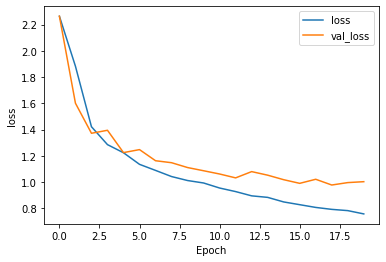

In [ ]:
pyplot.plot(history.history["loss"],label="loss")
pyplot.plot(history.history["val_loss"],label="val_loss")

pyplot.xlabel("Epoch")
pyplot.ylabel("loss")

pyplot.legend()
pyplot.show()

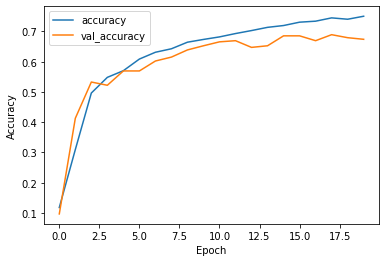

In [ ]:
pyplot.plot(history.history["accuracy"],label="accuracy")
pyplot.plot(history.history["val_accuracy"],label="val_accuracy")

pyplot.xlabel("Epoch")
pyplot.ylabel("Accuracy")

pyplot.legend()
pyplot.show()